In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('toluca.csv')
df.head(5)

,lotSize,workHours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361


In [3]:
df.describe()

,lotSize,workHours
count,25.000000,25.000000
mean,70.000000,312.280000
std,28.722813,113.137645
min,20.000000,113.000000
25%,50.000000,224.000000
50%,70.000000,342.000000
75%,90.000000,389.000000
max,120.000000,546.000000


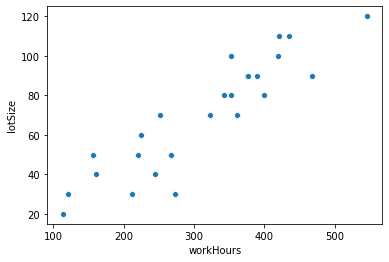

In [4]:
sns.scatterplot(x='workHours', y='lotSize', data=df)

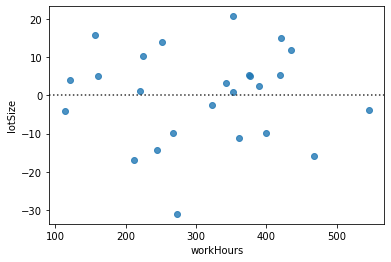

In [5]:
sns.residplot(x='workHours', y='lotSize', data=df)

In [6]:
model = LinearRegression()
model.fit(X=df[['workHours']], y=df[['lotSize']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
model.coef_, model.intercept_

(array([[0.2301084]]), array([-1.85825114]))

In [8]:
result = f"y = {model.coef_[0][0]} x + {model.intercept_[0]}"
result

'y = 0.23010839996895852 x + -1.858251142306358'

In [9]:
X = df[['workHours']]
y = df[['lotSize']]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
model.coef_, model.intercept_

(array([[0.2268276]]), array([-1.37228505]))

In [12]:
y_pred = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
print('RMSE:', np.sqrt(mse))

RMSE: 14.373325534996523


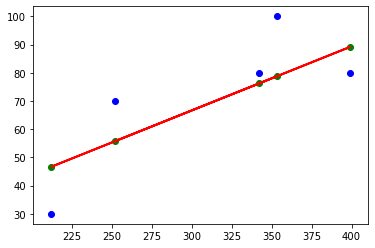

In [14]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.scatter(X_test, y_pred, color='green')
plt.show()